In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# simple linear regression
from sklearn.linear_model import LinearRegression


dataset = "./data/mushrooms.csv"
df = pd.read_csv(dataset)  # read DataSet

print("DataSet Size : {}".format(df.shape))
df.head(5)  # top 5 contents

DataSet Size : (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
# check the type of colums
df.dtypes 

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [3]:
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [4]:
# drop "class" column
df = df.drop('class', axis=1)
print(df.shape)
df.head()

(8124, 22)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# one-hot encoding for input data
for col in df.columns:
    df = pd.get_dummies(df, columns=[ col ])

df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
df.shape

(8124, 117)

In [7]:
for i in range(len(df.columns)):
    print(i , df.columns[i])

0 cap-shape_b
1 cap-shape_c
2 cap-shape_f
3 cap-shape_k
4 cap-shape_s
5 cap-shape_x
6 cap-surface_f
7 cap-surface_g
8 cap-surface_s
9 cap-surface_y
10 cap-color_b
11 cap-color_c
12 cap-color_e
13 cap-color_g
14 cap-color_n
15 cap-color_p
16 cap-color_r
17 cap-color_u
18 cap-color_w
19 cap-color_y
20 bruises_f
21 bruises_t
22 odor_a
23 odor_c
24 odor_f
25 odor_l
26 odor_m
27 odor_n
28 odor_p
29 odor_s
30 odor_y
31 gill-attachment_a
32 gill-attachment_f
33 gill-spacing_c
34 gill-spacing_w
35 gill-size_b
36 gill-size_n
37 gill-color_b
38 gill-color_e
39 gill-color_g
40 gill-color_h
41 gill-color_k
42 gill-color_n
43 gill-color_o
44 gill-color_p
45 gill-color_r
46 gill-color_u
47 gill-color_w
48 gill-color_y
49 stalk-shape_e
50 stalk-shape_t
51 stalk-root_?
52 stalk-root_b
53 stalk-root_c
54 stalk-root_e
55 stalk-root_r
56 stalk-surface-above-ring_f
57 stalk-surface-above-ring_k
58 stalk-surface-above-ring_s
59 stalk-surface-above-ring_y
60 stalk-surface-below-ring_f
61 stalk-surface-below

In [8]:
# read csv again in order to make label data
df_class = pd.read_csv(dataset, usecols=['class'])

In [9]:
# one-hot encoding for label data
df_label = pd.get_dummies(df_class['class'])

df_label.head()

,e,p
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [10]:
# drop "p" category column 
df_label = df_label.drop('p', axis=1)
df_label.head()

,e
0,0
1,1
2,1
3,0
4,1


In [11]:
x_data = df.iloc[:]
y_data = df_label.iloc[:]

from sklearn.model_selection import train_test_split

# train data : test data = 80 : 20
x_train, x_test, y_train, y_test = \
        train_test_split(x_data, y_data, random_state=42, test_size=.2)

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

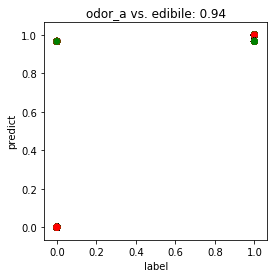

In [25]:
X = df.iloc[:,22:31]
y = df_label.iloc[:]
lm = LinearRegression()
lm.fit(X,y)
lm.coef_  # coefficients
lm.intercept_ # intercepter
yhat = lm.predict(X) # prediction
r2 = lm.score(X,y) # R2
rmse = np.sqrt(((y-yhat)**2).mean())

plt.rcParams["figure.figsize"] = (4, 4)
# plt.plot(X, y, 'bo')
# plt.plot(X, yhat, 'r-', linewidth=.5)
plt.scatter(y, yhat, color=['red', 'green'])
plt.xlabel("label")
plt.ylabel("predict")
plt.title('%s vs. edibile: %.2f' % (X.columns[0], r2))
plt.savefig('mlr-plot-1.png')
plt.show()

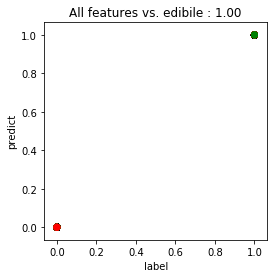

In [26]:
X = x_data
y = y_data
lm = LinearRegression()
lm.fit(X, y)
lm.coef_  # coefficients
lm.intercept_ # intercepter
yhat = lm.predict(X) # prediction
r2 = lm.score(X,y) # R2
rmse = np.sqrt(((y-yhat)**2).mean())

plt.scatter(yhat, y, color=['red', 'green'])
plt.xlabel("label")
plt.ylabel("predict")
plt.title('All features vs. edibile : %.2f' % r2)
plt.savefig('mlr-plot-2.png')
plt.show()

# Linear Regression Model

step:  0  cost:  3.6487134


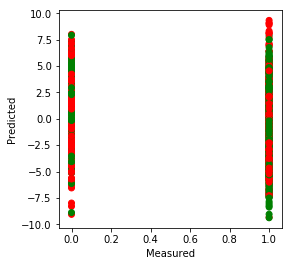

step:  1000  cost:  0.025972364


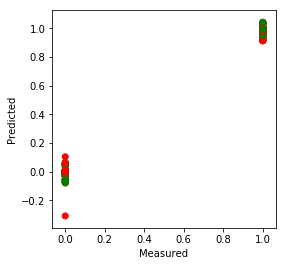

step:  2000  cost:  0.015582061


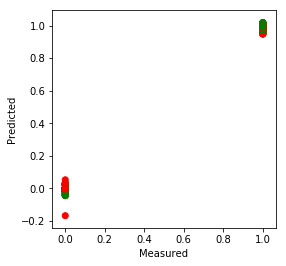

step:  3000  cost:  0.01040024


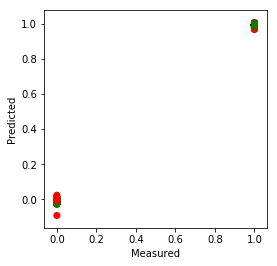

step:  4000  cost:  0.007998717


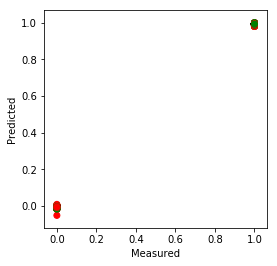

step:  5000  cost:  0.006907519


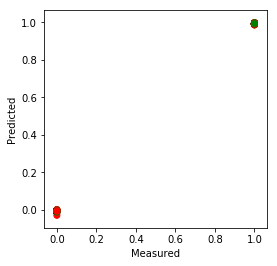

step:  6000  cost:  0.0064182547


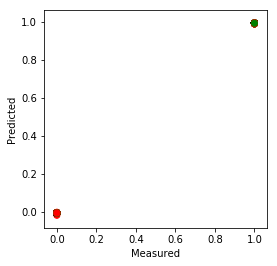

step:  7000  cost:  0.006203941


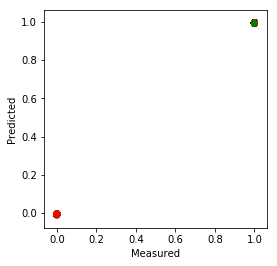

step:  8000  cost:  0.0061137704


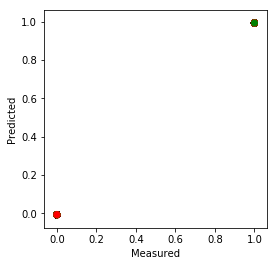

step:  9000  cost:  0.006076669


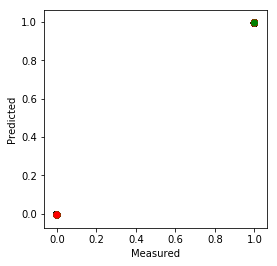

step:  10000  cost:  0.006061022


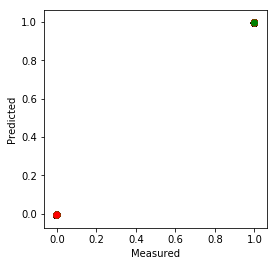

In [14]:
X = tf.placeholder(tf.float32, shape=[None, 117]) # X
Y = tf.placeholder(tf.float32, shape=[None, 1])   # Y

w_init = tf.contrib.layers.variance_scaling_initializer(factor=1., mode='FAN_AVG', uniform=True)
b_init = tf.zeros_initializer()

W = tf.get_variable(initializer=tf.random_normal(shape=[117, 1]), name='weight_lireg')
b = tf.get_variable(shape=[1], initializer=b_init, name='bias_lireg')
Y_ = tf.add(tf.matmul(X, W), b)

cost = tf.sqrt(tf.reduce_mean(tf.square(Y_ - Y)))  # RMSE
# train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost)
train = tf.train.AdamOptimizer(learning_rate=1e-2).minimize(cost)

# preds = tf.cast(1. if Y_ < Y else 0., dtype=tf.float32)
# acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1)), tf.float32))

# summary
tf.summary.histogram("Weights", W)
tf.summary.histogram("Biases", b)
tf.summary.scalar("loss", cost)

merged = tf.summary.merge_all()
writer = tf.summary.FileWriter('./model/')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer.add_graph(sess.graph)
    
    # Training
    for step in range(10001):
        cost_val, _ = sess.run([cost, train],
                               feed_dict={
                                   X: x_train,
                                   Y: y_train,
                               })

        if step % 1000 == 0:
            summary = sess.run(merged, feed_dict={X: x_train, Y: y_train})
            writer.add_summary(summary, global_step=step)
            print('step: ', step, ' cost: ', cost_val)
            
            # predicts, accs = sess.run([preds, acc], feed_dict={X: x_test, Y: y_test})
            # print('acc', accs)
            # print('Y/pred: ', y_test[:5], predicts[:5])

            fig, ax = plt.subplots()
            ax.scatter(y_test, sess.run(Y_, feed_dict={X: x_test}), color=['red','green'])
            # ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
            ax.set_xlabel('Measured')
            ax.set_ylabel('Predicted')
            plt.savefig('./predict-%d' % step)
            plt.show()
        
    # tf.equal(tf.argmax(y_test, 1), tf.argmax(sess.run(Y_, feed_dict={X: x_test}), 1))

            